# Section 05 
### Introduction to Data Science EN.553.436/EN.553.636 - Fall 2021

# 1. Principal Component Analysis

## Problem 1 
Load the breast cancer dataset from the sklearn.datasets and read the description of the dataset.

In [1]:
# load the breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# discription of the dataset
print(type(cancer))
print(cancer['DESCR'])

<class 'sklearn.utils.Bunch'>
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For 

In [2]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## 1.1 
Convert the dataset to a dataframe and use feature names as the column names. Plot the covariance matrix. What does it look like?

In [3]:
# convert cancer to the dataframe cancer_df
import pandas as pd
cancer_df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Populating the interactive namespace from numpy and matplotlib
(30, 569)


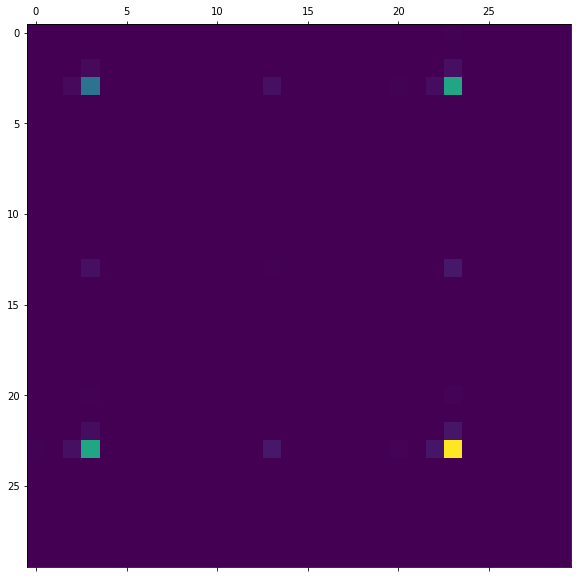

In [4]:
# plot the covariance matrix
import matplotlib.pyplot as plt
%pylab inline

# convert dataframe to matrix
cancer_M = cancer_df.values.T
print(cancer_M.shape)

# plot
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(1,1,1)
# use matshow to plot covariance matrix 
ax.matshow(((cancer_M-cancer_M.mean(axis=1, keepdims=True)) @ (cancer_M-cancer_M.mean(axis=1, keepdims=True)).T)/(cancer_M.shape[1]-1))

The covariance matrix looks like very sparse and most entries are 0.

## 1.2
Scale the data and then plot the covariance matrix of the new data.

In [5]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer_df)
scaled_cancer = scaler.transform(cancer_df)
# note that the scaled_cancer_df is a numpy.ndarray and is not a dataframe.
print(type(scaled_cancer))
print(scaled_cancer.shape)

<class 'numpy.ndarray'>
(569, 30)


(30, 569)


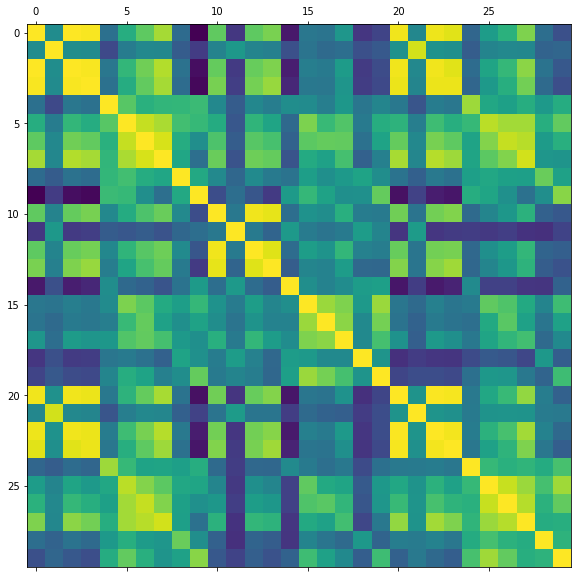

In [6]:
# plot the new covariance matrix

scaled_cancer_M = scaled_cancer.T
print(scaled_cancer_M.shape)
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(1,1,1)
ax.matshow(((scaled_cancer_M-scaled_cancer_M.mean(axis=1, keepdims=True)) @ (scaled_cancer_M-scaled_cancer_M.mean(axis=1, keepdims=True)).T) /(scaled_cancer_M.shape[1]-1))

## 1.3 
Implement PCA and use scree plot to analyze the results. Plot the covariance of the projected data matrix (in the original coordinate system) which is X_k in the notation of our lecture and plot the principal components. Try different number of components. 


In [7]:
# implement PCA  
from sklearn.decomposition import PCA
pca1 = PCA(n_components=5) 
pca1.fit(scaled_cancer)
cancer_pca1 = pca1.transform(scaled_cancer)
# explained variance or eigenvalues 
# note that they are sorted in an increasing order
L = pca1.explained_variance_ 
print("Explained variance for n = 5: \n",L)
print("Shape of the new data: \n", cancer_pca1.shape)
print("Type of the new data \n",type(cancer_pca1))

Explained variance for n = 5: 
 [13.30499079  5.7013746   2.82291016  1.98412752  1.65163324]
Shape of the new data: 
 (569, 5)
Type of the new data 
 <class 'numpy.ndarray'>


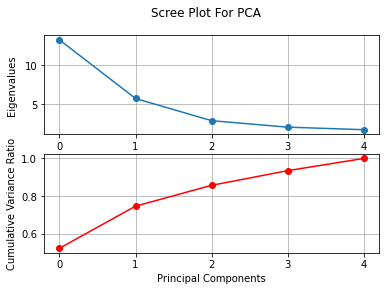

In [8]:
#  Scree plot 
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.align_ylabels()
fig.suptitle('Scree Plot For PCA')
ax1.xaxis.set_major_locator(MaxNLocator(integer = True))
ax2.xaxis.set_major_locator(MaxNLocator(integer = True))
# explained variance 
ax1.plot(L,'o-')
ax1.set_ylabel('Eigenvalues')
ax1.grid()
cmsm = np.cumsum(L)
# cumulative Variance Ratio
ax2.plot(cmsm/cmsm[-1],'o-r')
ax2.set_xlabel('Principal Components')
ax2.set_ylabel('Cumulative Variance Ratio');
ax2.grid()

From the first plot, we can see the explained variances of 5 different Principal Components, which are equal to 5 largest eigenvalues of the covariance matrix of the data. The values of the explained variance are dropping and cut down to small values at the fourth component. And in the second plot, we can see how the cumulative explained variance ratio changes. The explained variances of the first four components contribute to about 95% together.

You can try different number of components.

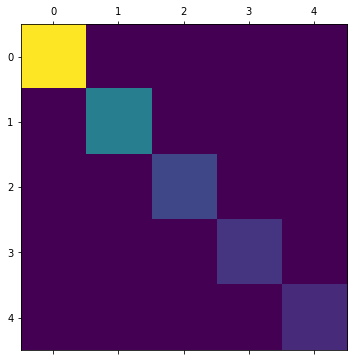

In [9]:
# plot the covariance matrix of principal components.

cancer_pca1_M = cancer_pca1.T
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1,1,1)
ax.matshow(((cancer_pca1_M-cancer_pca1_M.mean(axis=1, keepdims=True)) @ (cancer_pca1_M-cancer_pca1_M.mean(axis=1, keepdims=True)).T) /(cancer_pca1_M.shape[1]-1))

Shape of the projected data matrix: 
 (30, 569)


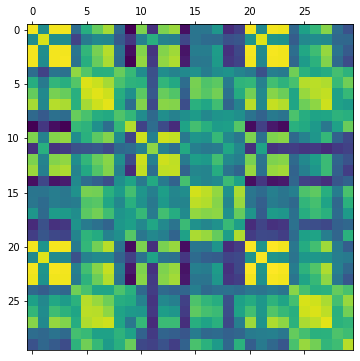

In [10]:
# plot the covariance matrix the projected data matrix.

X_k = pca1.inverse_transform(cancer_pca1).T
print("Shape of the projected data matrix: \n", X_k.shape)
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1,1,1)
ax.matshow(((X_k-X_k.mean(axis=1, keepdims=True)) @ (X_k-X_k.mean(axis=1, keepdims=True)).T) /(X_k.shape[1]-1))




The covariance matrix based on X_k is similar to that we plot in 1.2.(despite the fact that we only use 5 principal components here, and above 30 variables)

## 1.4 
Visualize the scaled data by plotting only on the first two features with the label.Then plot the PCA results using the first two compnents. Compare these two pictures and what can you find about them?  Try different pairs of features.

Text(0, 0.5, 'Mean Texture')

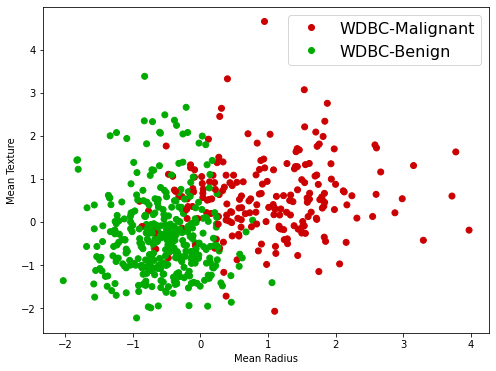

In [11]:
# first two features 
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(8,6));
cmap_bold = ListedColormap(['#CC0000', '#00AA00'])
scatter = ax.scatter(scaled_cancer[:,0],scaled_cancer[:,1],c=cancer['target'],cmap=cmap_bold)
ax.legend(handles=scatter.legend_elements()[0],labels=['WDBC-Malignant','WDBC-Benign'], fontsize=16);
ax.set_xlabel('Mean Radius')
ax.set_ylabel('Mean Texture')

Text(0, 0.5, 'Second Principal Component')

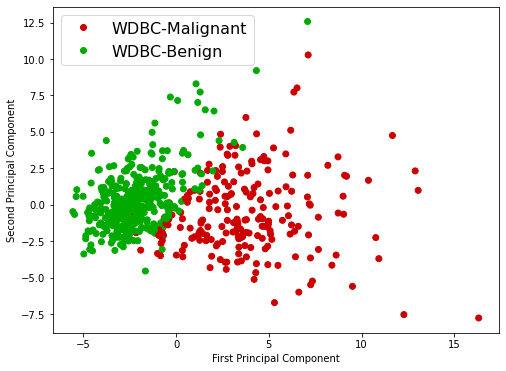

In [12]:
# first two components in the new data
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(8,6));
cmap_bold = ListedColormap(['#CC0000', '#00AA00'])
scatter = ax.scatter(cancer_pca1[:,0],cancer_pca1[:,1],c=cancer['target'],cmap=cmap_bold)
ax.legend(handles=scatter.legend_elements()[0],labels=['WDBC-Malignant','WDBC-Benign'], fontsize=16);
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')

After applying PCA to the data, it seems that the we can classify the data more easily.

Try different pairs.

Text(0, 0.5, 'Mean Smoothness')

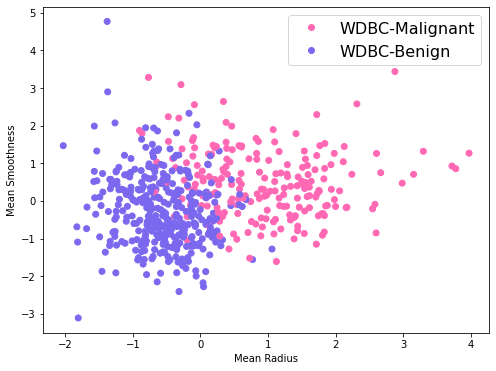

In [13]:
# first and fifth features 
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(8,6));
cmap_bold = ListedColormap(['#FF69B4', '#7B68EE'])
scatter = ax.scatter(scaled_cancer[:,0],scaled_cancer[:,4],c=cancer['target'],cmap=cmap_bold)
ax.legend(handles=scatter.legend_elements()[0],labels=['WDBC-Malignant','WDBC-Benign'], fontsize=16);
ax.set_xlabel('Mean Radius')
ax.set_ylabel('Mean Smoothness')

Text(0, 0.5, 'Fifth Principal Component')

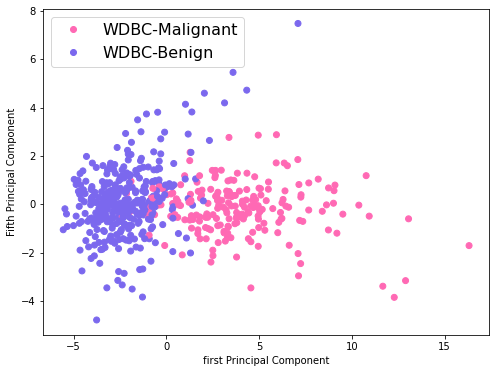

In [14]:
# first and fifth components in the new data
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(8,6));
cmap_bold = ListedColormap(['#FF69B4', '#7B68EE'])
scatter = ax.scatter(cancer_pca1[:,0],cancer_pca1[:,4],c=cancer['target'],cmap=cmap_bold)
ax.legend(handles=scatter.legend_elements()[0],labels=['WDBC-Malignant','WDBC-Benign'], fontsize=16);
ax.set_xlabel('first Principal Component')
ax.set_ylabel('Fifth Principal Component')


## 1.5

Create a 2D biplot and try to check how the first eight variable are behaved.

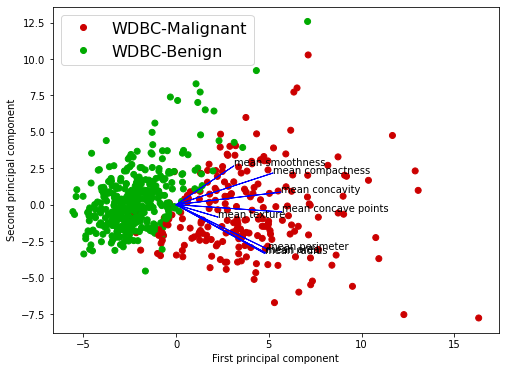

In [15]:
# Create biplot
V = pca1.components_

fig, ax = plt.subplots(figsize=(8,6));
cmap_bold = ListedColormap(['#CC0000', '#00AA00'])
scatter = ax.scatter(cancer_pca1[:,0],cancer_pca1[:,1],c=cancer['target'],cmap=cmap_bold)
ax.legend(handles=scatter.legend_elements()[0],labels=['WDBC-Malignant','WDBC-Benign'], fontsize=16);
scaling_fac = 6
for i in range(0,8):
    Q = ax.arrow(0,0,np.dot(scaling_fac*np.sqrt(pca1.explained_variance_[0]),V[0,i]),
               np.dot(scaling_fac*np.sqrt(pca1.explained_variance_[1]),V[1,i]),
               color='blue')
    ax.text(np.dot(scaling_fac*np.sqrt(pca1.explained_variance_[0]),V[0,i]),
           np.dot(scaling_fac*np.sqrt(pca1.explained_variance_[1]),V[1,i]),
           cancer.feature_names[i])
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')

plt.show()

From the quiver plot above, we can notice that the angles of these eight vectors are all less than 90 degrees, thus they are positive correlated. And we can notice the angle of 'mean smoothness' and 'mean radius' is relatively big, thus they might have weak positive correlation. 